In [ ]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt

In [ ]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [ ]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [ ]:
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data_frame['label'] = breast_cancer_dataset.target

In [ ]:
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [ ]:
data_frame.shape

(569, 31)

In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
data_frame.isnull().sum()


,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [ ]:
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
data_frame['label'].value_counts()

,count
label,
1,357
0,212


In [ ]:
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [ ]:
x = data_frame.drop(columns = 'label', axis = 1)
y = data_frame['label']

In [ ]:
print(x)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [ ]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(569, 30) (455, 30) (114, 30)


Model Training
1. Logestic Regression


In [ ]:
modelLR = LogisticRegression()
modelLR.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()


Model Evaluation

Accuracy Score

In [ ]:
x_train_prediction = modelLR.predict(x_train)
training_data_accuracy = accuracy_score(y_train, x_train_prediction)

In [ ]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.9472527472527472


In [ ]:
x_test_prediction = modelLR.predict(x_test)
test_data_accuracy = accuracy_score(y_test, x_test_prediction)

In [ ]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.9298245614035088


Standardize Data


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

Building Neural Network


In [ ]:
modelDL = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(2, activation = 'sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
modelDL.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
history = modelDL.fit(x_train_std, y_train, validation_split= 0.1, epochs = 100)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7554 - loss: 0.5441 - val_accuracy: 0.9130 - val_loss: 0.3937
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8540 - loss: 0.3947 - val_accuracy: 0.9565 - val_loss: 0.2847
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9078 - loss: 0.3037 - val_accuracy: 0.9565 - val_loss: 0.2223
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9208 - loss: 0.2482 - val_accuracy: 0.9565 - val_loss: 0.1852
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9235 - loss: 0.2123 - val_accuracy: 0.9565 - val_loss: 0.1612
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9367 - loss: 0.1869 - val_accuracy: 0.9565 - val_loss: 0.1443
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9399 - loss: 0.1674 - val_accuracy: 0.9565 - val_loss: 0.1315
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9417 - loss: 0.1518 - val_accuracy: 0.9565 - 

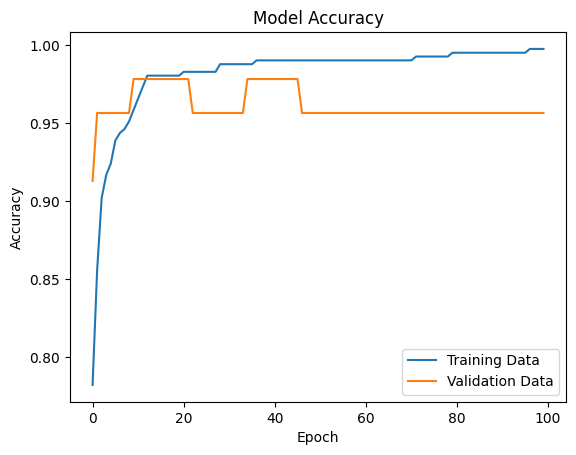

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc = 'lower right')

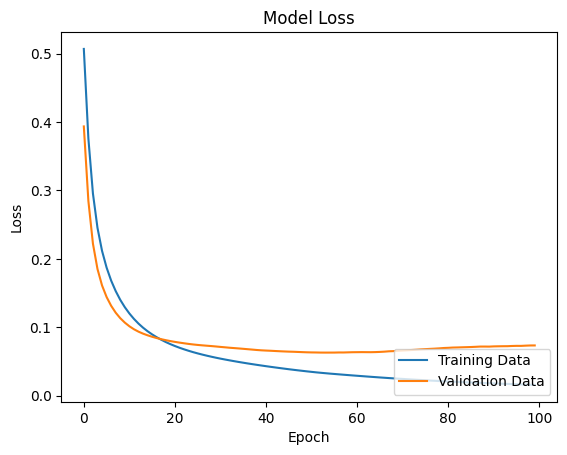

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc = 'lower right')

Accuracy (Test Data)

In [ ]:
loss , accuracy = modelDL.evaluate(x_test_std, y_test)
print (accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9658 - loss: 0.1024 
0.9561403393745422


In [ ]:
print(x_test_std.shape)
print(x_test_std[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [ ]:
y_pred = modelDL.predict(x_test_std)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [ ]:
print(y_pred.shape)
print(y_pred[0])

(114, 2)
[0.13946028 0.9037624 ]


In [ ]:
print(x_test_std)

[[-0.04462793 -1.41612656 -0.05903514 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [ 0.24583601 -0.06219797  0.21802678 ...  0.54129749  0.11047691
   0.0483572 ]
 [-1.26115925 -0.29051645 -1.26499659 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [ 0.72709489  0.45836817  0.75277276 ...  1.46701686  1.19909344
   0.65319961]
 [ 0.25437907  1.33054477  0.15659489 ... -1.29043534 -2.22561725
  -1.59557344]
 [ 0.84100232 -0.06676434  0.8929529  ...  2.15137705  0.35629355
   0.37459546]]


In [ ]:
print(y_pred)

[[1.3946028e-01 9.0376240e-01]
 [2.7920845e-01 5.0855947e-01]
 [1.9682257e-03 9.7266120e-01]
 [1.0000000e+00 2.9125191e-09]
 [3.0323684e-01 7.4202335e-01]
 [1.0000000e+00 1.5559588e-05]
 [7.2226696e-02 9.4862163e-01]
 [8.4817962e-04 9.3976611e-01]
 [5.2955863e-03 9.4872582e-01]
 [6.3859886e-03 9.3601531e-01]
 [8.7110460e-01 1.6824378e-01]
 [1.0308826e-01 7.4601263e-01]
 [1.4174935e-01 8.5298866e-01]
 [1.2040761e-01 6.1174220e-01]
 [1.7957886e-03 9.8012078e-01]
 [9.9995071e-01 2.1728077e-03]
 [5.0499300e-03 9.1059506e-01]
 [6.4051840e-03 9.9655503e-01]
 [1.0870455e-02 9.4856745e-01]
 [9.9999982e-01 9.2164766e-05]
 [1.2405195e-03 9.9998766e-01]
 [2.4376621e-03 9.6348369e-01]
 [7.4251015e-03 8.6874944e-01]
 [1.8335714e-03 9.8673934e-01]
 [7.3187612e-02 9.4337028e-01]
 [9.9999613e-01 5.9295265e-04]
 [2.0653043e-02 8.5002178e-01]
 [2.6587564e-01 7.4659705e-01]
 [9.9998933e-01 8.3358528e-04]
 [9.9999672e-01 3.3342050e-04]
 [4.9807869e-02 8.4692597e-01]
 [9.2139449e-03 9.7007853e-01]
 [5.7661

In [ ]:
#converting the prediction probability to class labels
y_pred_label = [np.argmax(i) for i in y_pred]
print(y_pred_label)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


Building the Predictive System

In [ ]:

input_data = (7.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189)
# Convert input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape data for a single prediction
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the input data using the same scaler used during training
input_data_std = scaler.transform(input_data_reshaped)

# Get prediction probability from the model
dl_prediction_prob = modelDL.predict(input_data_std)

# Print the raw prediction value (this will be a probability between 0 and 1)
dl_prediction_label  = [np.argmax(dl_prediction_prob)]
print(dl_prediction_prob)
print(dl_prediction_label)

# Convert prediction to a binary label (0 = malignant, 1 = benign)
if dl_prediction_label[0] >= 0.5:
    print("The Breast Cancer is Benign.")
else:
    print("The Breast Cancer is Malignant.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[1.0000000e+00 2.0669517e-05]]
[0]
The Breast Cancer is Malignant.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
def get_user_input():
    print("Please enter the following values for the tumor features:")

    feature_names = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness',
                     'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension',
                     'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error',
                     'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error',
                     'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness',
                     'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']

    input_data = []

    # Prompt user for each feature value
    for feature in feature_names:
        value = float(input(f"Enter value for {feature}: "))
        input_data.append(value)

    return np.array(input_data).reshape(1, -1)

In [ ]:
# Function to make predictions using both ML and DL models
def predict_disease(input_data):
    # Standardize the input data using the same scaler used during training
    input_data_std = scaler.transform(input_data)

    # ---- ML (Logistic Regression) Model Prediction ----
    ml_prediction = modelLR.predict(input_data_std)
    print(f"ML Model Prediction: {ml_prediction[0]} (1 = Benign, 0 = Malignant)")

    # ---- DL (Neural Network) Model Prediction ----
    dl_prediction_prob = modelDL.predict(input_data_std)
    print(f"DL Model Prediction Probability: {dl_prediction_prob[0][0]}")

    # Convert DL probability to binary prediction (1 = benign, 0 = malignant)
    if dl_prediction_prob[0][0] >= 0.5:
        print("DL Model Prediction: The Breast Cancer is Benign.")
    else:
        print("DL Model Prediction: The Breast Cancer is Malignant.")

# Main execution
if __name__ == "__main__":
    # Get user input for tumor data
    user_data = get_user_input()

    # Predict the disease using both models
    predict_disease(user_data)
#14.99,25.2,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,1.214,2.188,8.077,106,0.006883,0.01094,0.01818,0.01917,0.007882,0.001754,14.99,25.2,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.055040

Please enter the following values for the tumor features:
Enter value for mean radius: 14.99
Enter value for mean texture: 25.2
Enter value for mean perimeter: 95.54
Enter value for mean area: 698.8
Enter value for mean smoothness: 0.09387
Enter value for mean compactness: 0.05131
Enter value for mean concavity: 0.02398
Enter value for mean concave points: 0.02899
Enter value for mean symmetry: 0.1565
Enter value for mean fractal dimension: 0.05504
Enter value for radius error: 1.214
Enter value for texture error: 2.188
Enter value for perimeter error: 8.077
Enter value for area error: 106
Enter value for smoothness error: 0.006883
Enter value for compactness error: 0.01094
Enter value for concavity error: 0.01818
Enter value for concave points error: 0.019
Enter value for symmetry error: 0.007882
Enter value for fractal dimension error: 0.001754
Enter value for worst radius: 14.99
Enter value for worst texture: 25.2
Enter value for worst perimeter: 95.54
Enter value for worst area: 69

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
import joblib  # For saving the ML model
from tensorflow.keras.models import load_model  # For saving and loading DL models

# Save the ML model (Logistic Regression)
joblib.dump(modelLR, 'logistic_regression_model.pkl')

# Save the DL model (Neural Network)
modelDL.save('neural_network_model.h5')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
!pip install streamlit scikit-learn tensorflow


In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.136.32.96


In [115]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.136.32.96:8501

your url is: https://petite-rabbits-crash.loca.lt
2024-09-16 09:58:28.520009: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-16 09:58:28.557057: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-16 09:58:28.568362: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-16 09:58:30.803919: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/p